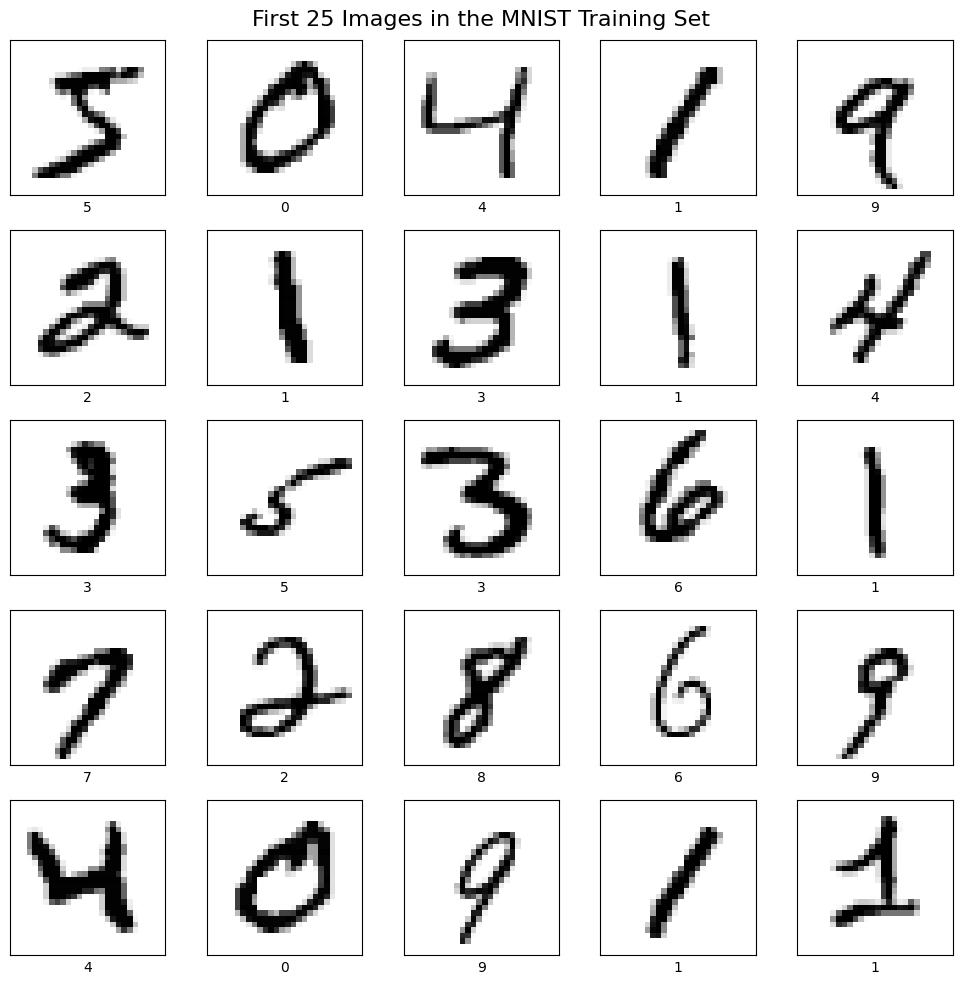

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.8813 - loss: 0.4236 - val_accuracy: 0.9598 - val_loss: 0.1337
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9652 - loss: 0.1190 - val_accuracy: 0.9711 - val_loss: 0.0963
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.9780 - loss: 0.0744 - val_accuracy: 0.9742 - val_loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.9834 - loss: 0.0551 - val_accuracy: 0.9760 - val_loss: 0.0830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9787 - val_loss: 0.0712
313/313 - 0s - 238us/step - accuracy: 0.9787 - loss: 0.0712

Test accuracy: 0.9787


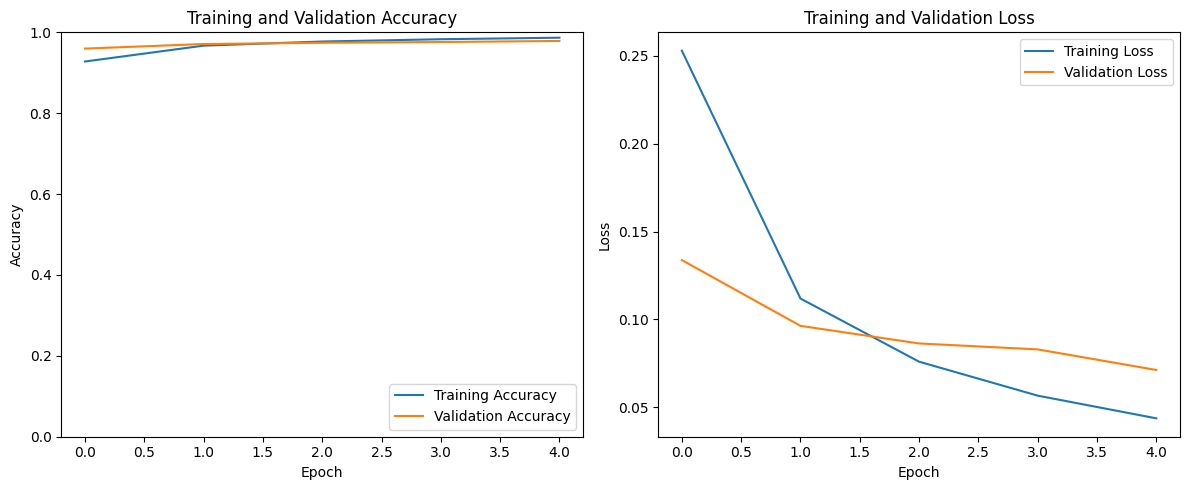

In [8]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import ssl

# Bypass SSL verification if needed (uncomment the following line if necessary)
ssl._create_default_https_context = ssl._create_unverified_context

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a 0-1 range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualizing the first 9 images in the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])  # Display the actual digit
plt.suptitle("First 25 Images in the MNIST Training Set", fontsize=16)
plt.tight_layout()
plt.show()

# Building a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten the 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),   # First hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


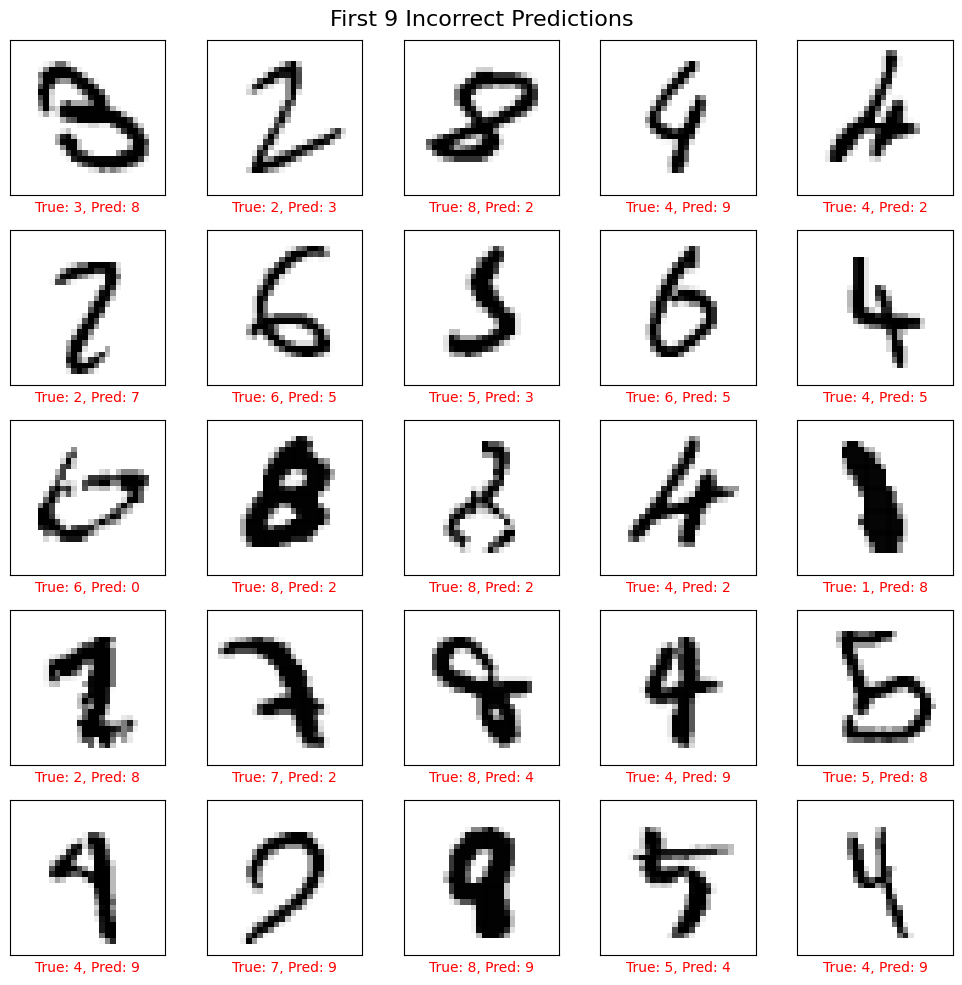

In [10]:
# Making predictions
predictions = model.predict(x_test)

# Finding incorrect predictions
incorrect_indices = [i for i, (pred, actual) in enumerate(zip(predictions, y_test)) 
                     if tf.argmax(pred).numpy() != actual]

# Plotting incorrect predictions
plt.figure(figsize=(10, 10))
for i, incorrect_index in enumerate(incorrect_indices[:25]):  # Displaying first 9 incorrect predictions
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[incorrect_index], cmap=plt.cm.binary)
    true_label = y_test[incorrect_index]
    predicted_label = tf.argmax(predictions[incorrect_index]).numpy()
    plt.xlabel(f"True: {true_label}, Pred: {predicted_label}", color="red")

plt.suptitle("First 9 Incorrect Predictions", fontsize=16)
plt.tight_layout()
plt.show()
